In [1]:
from itertools import compress
import os
import pandas as pd

import random
from sklearn.preprocessing import LabelEncoder

import torch
import torchaudio as ta
from torchcodec.decoders import AudioDecoder
import torchaudio.functional as AF
from torch.utils.data import Dataset, DataLoader

from functions.dl.data_classes import SpectroDataset, CombinedSpectroDataset, SpectroDataLoader

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [12]:
r_path ="./AudioTensors"
l_path = os.getcwd()

In [13]:
dir_files = os.listdir(l_path)
parquet_file = next(f for f in dir_files if f.endswith("_single.parquet"))
sound_df = pd.read_parquet(os.path.join(l_path, parquet_file))
sound_df = sound_df.drop(sound_df.loc[sound_df.label.isna()].index)

In [14]:
sound_df

,id,label,geometry
0,1000106,312,b'\x01\x01\x00\x00\x00\x8d\x02\xe1\xdcW\xd7NA\...
1,1000371,312,b'\x01\x01\x00\x00\x00\xf8=\xfb;\xbamPAkmD4quIA'
2,1001124,313,b'\x01\x01\x00\x00\x00\r?g\xbf\xfa\xc2OA\x1e\x...
3,1001127,313,b'\x01\x01\x00\x00\x00\xdeiL\x0c\n\xc3OA:\xfa\...
4,100114,231,b'\x01\x01\x00\x00\x00\xa3\x18|\xd0\xdbCPA\xb4...
...,...,...,...
157363,999439,322,b'\x01\x01\x00\x00\x00\xc8\xf7X\x98rKQA\xe4\xb...
157364,999547,312,b'\x01\x01\x00\x00\x00\xf9\xf1<\xae\xaemPA\xcc...
157365,99984,313,b'\x01\x01\x00\x00\x00\x16\xa1\xc9\x9f\xdf\xbf...
157366,99986,313,b'\x01\x01\x00\x00\x00\x16\xa1\xc9\x9f\xdf\xbf...


In [97]:
dawn_file = "F:/Persönliches/Git/BioOTon/points_single.parquet"
xeno_file = "F:/Persönliches/Git/BioOTon/xeno_points_single.parquet"
augmented_file = "F:/Persönliches/Git/BioOTon/augmented_points_single.parquet"

ds = CombinedSpectroDataset(dawn_file, xeno_file, augmented_file, device = device, denoised = True)

In [98]:
dawn_df = pd.read_parquet(dawn_file)
xeno_df = pd.read_parquet(xeno_file)
xeno_df.id = xeno_df.id.astype(int)
aug_df = pd.read_parquet(augmented_file)

In [99]:
i = 201000
ds.combined_file_paths[i], ds.combined_point_labels[i]

(WindowsPath('F:/Persönliches/Git/BioOTon/augmented_data_denoised/wn_979694_audio_dn.pt'),
 '211')

In [100]:
dawn_df.loc[dawn_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

,id,geometry,label


In [101]:
xeno_df.loc[xeno_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

,id,geometry,label
6856,979694,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...,211


In [102]:
aug_df.loc[aug_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

,id,label,geometry
15664,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
31391,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
47118,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
62845,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
78589,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
94316,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
110070,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
125797,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
141551,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
157305,979694,211,b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...


In [59]:
from functions.fair_train_test.utils_real_set import SpatialFairSplit

In [7]:
import pandas as pd
import geopandas as gpd

In [61]:
pframe  = pd.read_parquet("./dawn-chorus-soundscape.parquet")

In [71]:
pframe  = pd.read_parquet("./dawn-chorus-soundscape.parquet")
pframe = pframe[["id", "lat", "lng"]]
pframe = pframe.rename(columns={"lat":"Y", "lng":"X"})

In [56]:
pframes  = pd.read_parquet("./points_single.parquet")

In [3]:
from pathlib import Path
import os

In [11]:
Path(os.getcwd(), "abc.pt").stem

'abc'

In [ ]:
pframes  = pd.read_parquet("./points_single.parquet")
pframes["geometry"] = gpd.GeoSeries.from_wkb(pframes.geometry)
pframes["X"] = gpd.GeoSeries(pframes.geometry).x
pframes["Y"] = gpd.GeoSeries(pframes.geometry).x
pframes.drop("geometry", axis=1, inplace=True)

In [69]:
gpd.GeoSeries(pframes.geometry).y[1]

np.float64(3079768.9582882784)

In [14]:
import paramiko
import getpass
from pathlib import Path

host = 'os-login.lsdf.kit.edu'
    
port = 22
username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

transport = paramiko.Transport((host, port))
transport.connect(username = username, password = password)

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")

input_dir ="./AudioTensors"
output_dir = "./AudioTensors"

local_files = list(Path(input_dir).glob("*.pt"))
local_files_list = [file.name for file in local_files]

remote_files = sftp.listdir(output_dir)

files = [x for x in local_files_list if x not in remote_files]


print(f"Total files to process: {len(files)}")

Total files to process: 3


In [27]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import ffmpeg
from functools import partial
import getpass
import io
import os
import paramiko
import random
import time
import torch
import tqdm
import numpy as np
import noisereduce as nr
import threading
thread_local = threading.local()

def get_sftp():
    """Returns the SFTP client for the current thread, creating it if it doesn't exist."""
    if not hasattr(thread_local, "sftp"):
        time.sleep(random.uniform(0, 256))
        transport = paramiko.Transport((host, port))
        # Use your existing username/password variables here
        transport.connect(username=username, password=password)
        thread_local.transport = transport
        thread_local.sftp = paramiko.SFTPClient.from_transport(transport)
        thread_local.sftp.chdir("./data")
    return thread_local.sftp

def loadPT(input_dir, audio_file):
    """
    Instantiates a torch audio file.

    Input:
        audio_file - path to the .pt-file

    Output: 
        audio_file - the loaded tensor
    """
    #sftp = get_sftp()
    print(f"Opening from {sftp.getcwd()}/{input_dir}/{str(audio_file)}")
    with sftp.open(f"{sftp.getcwd()}/{input_dir}/{str(audio_file)}", 'rb') as remote_file:
        file_content = remote_file.read()
        buffer = io.BytesIO(file_content)
        return torch.load(buffer, map_location=torch.device('cpu'))

In [57]:
dawn_dir = Path("./AudioTensors_denoised_cut")

In [58]:
dawn_dir

WindowsPath('AudioTensors_denoised_cut')

In [56]:
dawn_dir.parent

WindowsPath('f:/Persönliches/Git/BioOTon')

In [31]:
host = 'os-login.lsdf.kit.edu'
port = 22

transport = paramiko.Transport((host, port))

username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

transport.connect(username = username, password = password)

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")

input_dir ="./AudioTensors"
output_dir = "./AudioTensors_denoised"

files = sftp.listdir(input_dir)

loadPT("./AudioTensors", files[0])

Opening from /lsdf01/lsdf/kit/stud/uyrra/data/./AudioTensors/27845214_audio.pt


tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0884, -0.0164, -0.0554],
       dtype=torch.float16)

In [30]:
files

['27845214_audio.pt',
 '22671133_audio.pt',
 '24593296_audio.pt',
 '21946266_audio.pt',
 '28075247_audio.pt',
 '27906968_audio.pt',
 '22970747_audio.pt',
 '27790256_audio.pt',
 '27964271_audio.pt',
 '22599753_audio.pt',
 '23042141_audio.pt',
 '28225392_audio.pt',
 '27892846_audio.pt',
 '22459843_audio.pt',
 '23899852_audio.pt',
 '25569980_audio.pt',
 '27442377_audio.pt',
 '27933269_audio.pt',
 '23522911_audio.pt',
 '26834566_audio.pt',
 '22398870_audio.pt',
 '22471077_audio.pt',
 '22970726_audio.pt',
 '27969985_audio.pt',
 '27634854_audio.pt',
 '22758824_audio.pt',
 '19968084_audio.pt',
 '22289418_audio.pt',
 '22638266_audio.pt',
 '22299429_audio.pt',
 '27702246_audio.pt',
 '22504711_audio.pt',
 '29037613_audio.pt',
 '27438943_audio.pt',
 '22454804_audio.pt',
 '22387141_audio.pt',
 '28423810_audio.pt',
 '28184219_audio.pt',
 '27587080_audio.pt',
 '22616648_audio.pt',
 '23887702_audio.pt',
 '27602599_audio.pt',
 '22298155_audio.pt',
 '25241406_audio.pt',
 '27833597_audio.pt',
 '23231699

In [19]:
import paramiko
import getpass

host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)

AuthenticationException: Authentication failed.

In [ ]:
sftp.chdir("./data")

In [52]:
print(sftp.getcwd())

/lsdf01/lsdf/kit/stud/uyrra/data


In [54]:
from pathlib import Path

In [55]:
file_dir = Path("./AudioTensors_denoised")

In [56]:
file_dir.stem

'AudioTensors_denoised'

In [57]:
host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

file_dir = Path("./AudioTensors_denoised")
files = list(file_dir.glob("*.pt"))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")
print(sftp.getcwd())

sftp.mkdir(file_dir.stem)

print(f"Total files to process: {len(files)}")

/lsdf01/lsdf/kit/stud/uyrra/data
Total files to process: 43826


In [73]:
def push_to_lsdf(sftp, output_dir, file):
    target_path = f"{output_dir.stem}/{file.stem}"
    sftp.put(file, target_path)

In [ ]:
push_to_lsdf(sftp, file_dir, files[0])

Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)


In [ ]:
import paramiko
import getpass

host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")
print(sftp.getcwd())
sftp.listdir("")
sftp.close()
transport.close()
print('Upload done.')

[]

In [ ]:
sftp.close()
transport.close()
print('Upload done.')

Upload done.


In [ ]:
import sys
path = './THETARGETDIRECTORY/' + sys.argv[1]    #hard-coded
localpath = sys.argv[1]
sftp.put(localpath, path)

sftp.close()
transport.close()
print('Upload done.')


In [1]:
from ftplib import FTP

In [27]:
ftp = FTP('os-webdav.lsdf.kit.edu', user=username, passwd=getpass.getpass())

TimeoutError: [WinError 10060] Ein Verbindungsversuch ist fehlgeschlagen, da die Gegenstelle nach einer bestimmten Zeitspanne nicht richtig reagiert hat, oder die hergestellte Verbindung war fehlerhaft, da der verbundene Host nicht reagiert hat

In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import getpass
import os
import paramiko
from pathlib import Path
import random
import time
import threading
import torch
import tqdm

thread_local = threading.local()
pool = None

class SFTPConnectionPool:
    def __init__(self, host, port, username, password):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.transport = None
        self._lock = threading.Lock()
        self.thread_local = threading.local()

    def _get_transport(self):
        with self._lock:
            # Check if transport is dead or closed
            if self.transport is None or not self.transport.is_active():
                print(f"[{threading.current_thread().name}] Establishing new Transport...")
                self.transport = paramiko.Transport((self.host, self.port))
                self.transport.connect(username=self.username, password=self.password)
            return self.transport

    def get_sftp(self):
        # If the thread already has a client, check if it's still alive
        if hasattr(self.thread_local, "sftp"):
            try:
                self.thread_local.sftp.listdir('.') # Test the connection
                return self.thread_local.sftp
            except:
                del self.thread_local.sftp # It's dead, remove it

        # Attempt to create a new SFTP client with retries
        for i in range(5): # Try 5 times to get a channel
            try:
                time.sleep(random.uniform(0, 32))
                transport = self._get_transport()
                sftp = paramiko.SFTPClient.from_transport(transport)
                sftp.chdir("./data")
                self.thread_local.sftp = sftp
                return sftp
            except Exception as e:
                wait = (i + 1) * 2
                print(f"Channel failed, retrying in {wait}s... Error: {e}")
                time.sleep(wait)
                # Force transport reset on 3rd failure
                if i == 2: self.transport = None 
        
        raise RuntimeError("Could not connect to SFTP after 5 attempts")

In [ ]:
host = 'os-login.lsdf.kit.edu'
port = 22

username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

pool = SFTPConnectionPool(host, port, username, password)

main_sftp = pool.get_sftp()
main_sftp.chdir(".")

input_dir = f"./AudioTensors_denoised"
output_dir = f"./AudioTensors_denoised_cut"

files = main_sftp.listdir(output_dir)

processed_files = [f for f in files if f.startswith("cut_0")]
cut_processed_files = [x[6:] for x in processed_files]

print(f"Found {len(cut_processed_files)} files that are not corrupted.")

local_files = list(Path(input_dir).glob("*.pt"))
local_files_list = [file.name for file in local_files]


corrupted_files = [x for x in local_files_list if x not in cut_processed_files]

print(f"Total files to process: {len(corrupted_files)}")

[MainThread] Establishing new Transport...
['cut_3_22943907_audio_dn.pt', 'cut_1_28020244_audio_dn.pt', 'cut_0_29021020_audio_dn.pt', 'cut_0_27669202_audio_dn.pt', 'cut_0_19226760_audio_dn.pt', 'cut_0_22806825_audio_dn.pt', 'cut_1_27587896_audio_dn.pt', 'cut_0_23023296_audio_dn.pt', 'cut_4_rem_23822837_audio_dn.pt', 'cut_0_22779757_audio_dn.pt', 'cut_1_27729744_audio_dn.pt', 'cut_1_27383368_audio_dn.pt', 'cut_0_27892624_audio_dn.pt', 'cut_3_27305497_audio_dn.pt', 'cut_0_23129858_audio_dn.pt', 'cut_0_22822782_audio_dn.pt', 'cut_4_rem_27478737_audio_dn.pt', 'cut_1_23042170_audio_dn.pt', 'cut_1_22796542_audio_dn.pt', 'cut_1_28007196_audio_dn.pt', 'cut_4_rem_22516224_audio_dn.pt', 'cut_4_rem_23041682_audio_dn.pt', 'cut_3_rem_23375195_audio_dn.pt', 'cut_0_26757549_audio_dn.pt', 'cut_2_24059714_audio_dn.pt', 'cut_0_27438857_audio_dn.pt', 'cut_0_27655718_audio_dn.pt', 'cut_0_27578996_audio_dn.pt', 'cut_1_27702202_audio_dn.pt', 'cut_2_27603555_audio_dn.pt', 'cut_1_27773644_audio_dn.pt', 'cut_0

In [11]:
processed_files[0]

'cut_0_29021020_audio_dn.pt'

In [3]:
import requests
from requests.auth import HTTPBasicAuth
import getpass

In [9]:
host = 'https://os-webdav.lsdf.kit.edu'
user = input("Username: ")
password = getpass.getpass()

response = requests.request('PROPFIND', host, auth=HTTPBasicAuth(user, password))

In [5]:
response

<Response [401]>

In [19]:
cut_processed_files

['29021020_audio_dn.pt',
 '27669202_audio_dn.pt',
 '19226760_audio_dn.pt',
 '22806825_audio_dn.pt',
 '23023296_audio_dn.pt',
 '22779757_audio_dn.pt',
 '27892624_audio_dn.pt',
 '23129858_audio_dn.pt',
 '22822782_audio_dn.pt',
 '26757549_audio_dn.pt',
 '27438857_audio_dn.pt',
 '27655718_audio_dn.pt',
 '27578996_audio_dn.pt',
 '27909026_audio_dn.pt',
 '27738653_audio_dn.pt',
 '28068466_audio_dn.pt',
 '27603783_audio_dn.pt',
 '22637451_audio_dn.pt',
 '27489073_audio_dn.pt',
 '27488983_audio_dn.pt',
 '28054512_audio_dn.pt',
 '23415800_audio_dn.pt',
 '27483444_audio_dn.pt',
 '27564278_audio_dn.pt',
 '22975838_audio_dn.pt',
 '26620338_audio_dn.pt',
 '23066540_audio_dn.pt',
 '26764529_audio_dn.pt',
 '27454090_audio_dn.pt',
 '27471598_audio_dn.pt',
 '27729495_audio_dn.pt',
 '25794580_audio_dn.pt',
 '19968142_audio_dn.pt',
 '27380968_audio_dn.pt',
 '28191189_audio_dn.pt',
 '27973979_audio_dn.pt',
 '22847539_audio_dn.pt',
 '22270025_audio_dn.pt',
 '27489334_audio_dn.pt',
 '27322262_audio_dn.pt',


In [7]:
corrupted_files = [x for x in local_files_list if x not in processed_files]

In [24]:
processed_files = [f for f in files if f.startswith("cut_0")]
processed_files

[]

In [23]:
import geopandas as gpd
from itertools import compress
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import rasterio
from rasterio.enums import Resampling
from sklearn.preprocessing import LabelEncoder

from functions.processing.retrieval import selectSubset
from functions.processing.retrieval import process_points_dir, process_cut_points_dir


In [58]:
dawn_file = "F:/Persönliches/Git/BioOTon/points_single.parquet"
xeno_file = "F:/Persönliches/Git/BioOTon/xeno_points_single.parquet"
augmented_file = "F:/Persönliches/Git/BioOTon/augmented_points_single.parquet"

folder_suffix = ""
# Query denoised to get the file path to be used

folder_suffix += "_denoised"

folder_suffix += "_cut"
dawn_points_file_path, dawn_recordings_path, dawn_df, dawn_files, dawn_subset, dawn_filtered_files, dawn_filtered_labels = process_cut_points_dir(Path(dawn_file), "AudioTensors", folder_suffix)
xeno_points_file_path, xeno_recordings_path, xeno_df, xeno_files, xeno_subset, xeno_filtered_files, xeno_filtered_labels = process_cut_points_dir(Path(xeno_file), "XenoCanto", folder_suffix)
augmented_points_file_path, augmented_recordings_path, augmented_df, augmented_files, augmented_subset, augmented_filtered_files, augmented_filtered_labels = process_cut_points_dir(Path(augmented_file), "augmented_data", folder_suffix)

In [48]:
dawn_frame = pd.DataFrame(columns={"str_id":[], "cut":[], "id":[], "geometry":[], "X":[], "Y":[], "label":[], "label_agg":[]})

In [49]:
import re

In [98]:
def compute_stratify_frame(frame, filtered_files):
    cuts = [int(re.search(r'cut_\d+'.split("_")[1], file.name).group()) for file in filtered_files]
    ids = [int(file.name.split("_")[2]) for file in filtered_files]
    str_ids = [f"{cut}_{id}" for cut, id in zip(cuts, ids)]
    wkb_lookup = frame.drop_duplicates('id').set_index('id')['geometry'].to_dict()
    geometries = gpd.GeoSeries.from_wkb([wkb_lookup[int(id)] for id in ids if int(id) in wkb_lookup])
    # geometries = [gpd.GeoSeries.from_wkb(frame.loc[frame.id == int(id)].geometry) for id in ids]
    Xs = [geometry.x for geometry in geometries]
    Ys = [geometry.y for geometry in geometries]
    label_map = frame.drop_duplicates('id').set_index('id')['label'].to_dict()
    labels = [int(label_map[int(id)]) for id in ids if int(id) in label_map]
    # labels = [frame.loc[frame.id == int(id)].label.values[0] for id in ids]
    label_aggs = [int(int(label)/10) for label in labels]

    stratify_frame = pd.DataFrame(data={"str_id" : str_ids, "cut" : cuts, "id" : ids, "geometry" : geometries, "X" : Xs, "Y" : Ys, "label" : labels, "label_agg" : label_aggs})
    return stratify_frame

In [104]:
combined_subset = pd.concat([compute_stratify_frame(dawn_subset, dawn_filtered_files), compute_stratify_frame(xeno_subset, xeno_filtered_files)], ignore_index=True)

In [ ]:
# pframes  = pd.read_parquet("./points_single.parquet")
# pframes["geometry"] = gpd.GeoSeries.from_wkb(pframes.geometry)
# pframes["X"] = gpd.GeoSeries(pframes.geometry).x
# pframes["Y"] = gpd.GeoSeries(pframes.geometry).y
# pframes = pframes.dropna()
# pframes["label_agg"] = [int(int(label)/10) for label in pframes.label]
# # pframes.drop("geometry", axis=1, inplace=True)

In [106]:
wanted_oc = [
    # Closed off areas
    "112", #discontinuous urban fabric
    "221","222", "244", # Vineyards, Fruit tree and berry plantations (2/3 are trees), Agro-forestry
    "31", # Forest

    # Open areas
    "141", # green urban areas
    "211", "212", "23", "241", "242", "243", # arable land (non- / permanently irrigated), pastures, annual crops, complex cultivation, agriculture+natural vegetation 
    "32", # Shrub and herbaceous
    "41" # Inland wetlands
]
closed_codes = ["112", "221", "222", "244", "31"]

In [107]:
subset = selectSubset(combined_subset, wanted_oc)

In [156]:
upscale_factor = 1/10 # 1 cell is 1000m x 1000m

corine_dir = "F:\\Persönliches\\Git\\BioOTon"
dir_files = os.listdir(corine_dir)
raster_file = os.path.join(corine_dir, list(compress(dir_files, [file.endswith("clip.tif") for file in dir_files]))[0])


# coord_list = [(x, y) for x, y in zip(pframes["X"], pframes["Y"])]
with rasterio.open(raster_file) as tif:
    print("Loaded raster successfully. Changing resolution.")
    data = tif.read(
        out_shape=(
            tif.count,
            int(tif.height * upscale_factor),
            int(tif.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    transform = tif.transform * tif.transform.scale(
        (tif.width / data.shape[-1]),
        (tif.height / data.shape[-2])
    )
    
    print("Successfully changed resolution.")

    row, col = rasterio.transform.rowcol(transform, subset["X"], subset["Y"])

    # cell_ids = [tif.width * (idx := tif.index(*val))[0] + idx[1] for val in coord_list]
    cell_ids = [data.shape[-1] * row + col] 
    subset["cell_id"] = cell_ids[0]


Loaded raster successfully. Changing resolution.
Successfully changed resolution.


C:\Users\mfher\AppData\Local\Temp\ipykernel_31616\3121525823.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["cell_id"] = cell_ids[0]


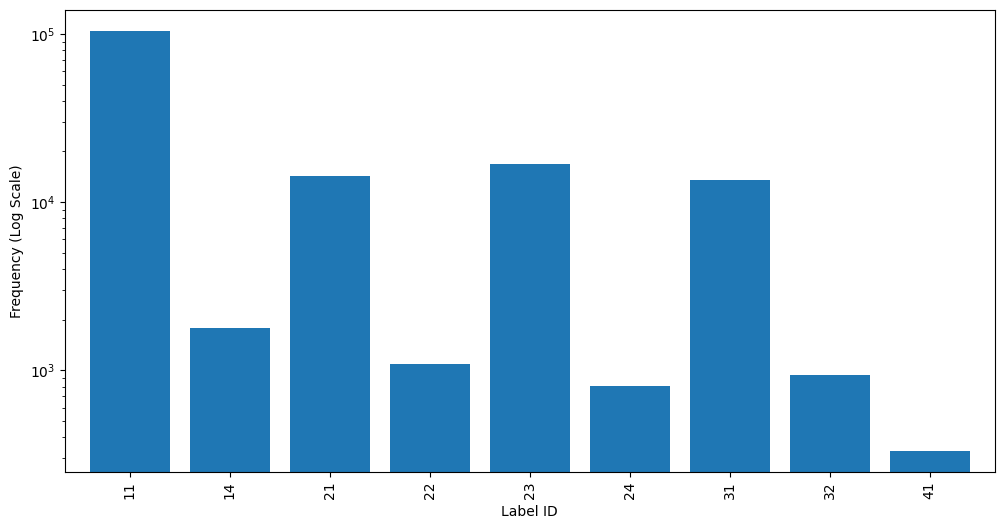

In [157]:
counts = subset.label_agg.value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Add logy=True to force the Y-axis into log scale
counts.plot(kind='bar', width=0.8, logy=True)

plt.xlabel("Label ID")
plt.ylabel("Frequency (Log Scale)")
plt.show()

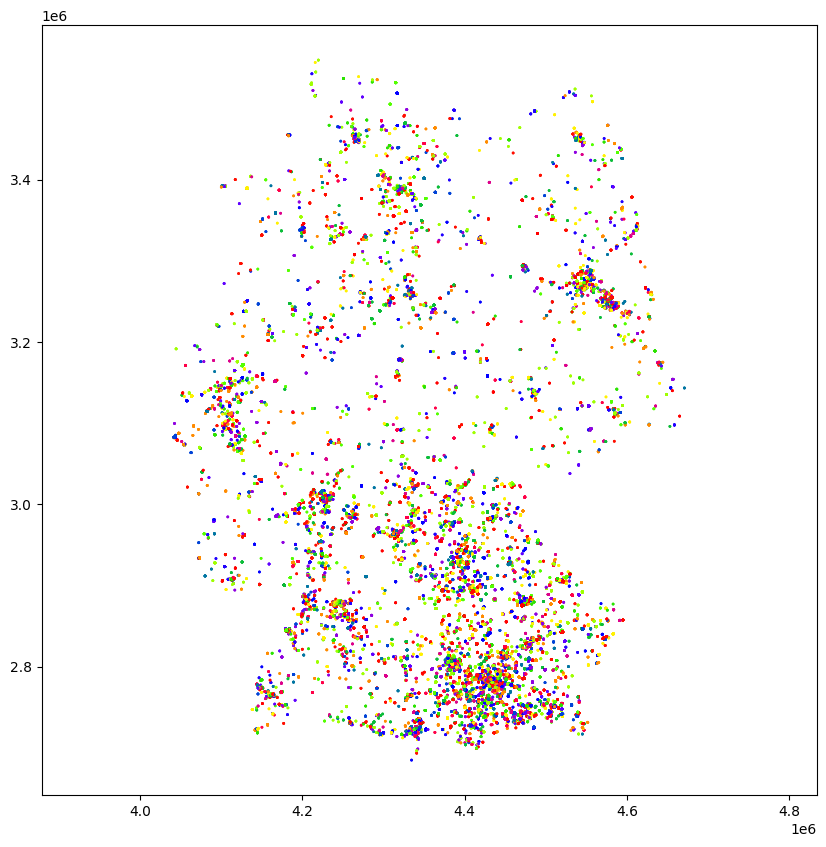

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(subset.X, subset.Y, c=subset.cell_id % 20, s=1, cmap='prism')

ax.set_aspect('equal', adjustable='datalim')

plt.show()

In [159]:
gdf = subset.copy()
# stratify_key
gdf['stratify_key'] = gdf['cell_id'].astype(str) + "_" + gdf['label_agg'].astype(str)

In [160]:
gdf

,str_id,cut,id,geometry,X,Y,label,label_agg,cell_id,stratify_key
0,0_19068740,0,19068740,POINT (4045828.891 3079160.082),4.045829e+06,3.079160e+06,112,11,305771,305771_11
1,1_19068740,1,19068740,POINT (4045828.891 3079160.082),4.045829e+06,3.079160e+06,112,11,305771,305771_11
2,2_19068740,2,19068740,POINT (4045828.891 3079160.082),4.045829e+06,3.079160e+06,112,11,305771,305771_11
3,3_19068740,3,19068740,POINT (4045828.891 3079160.082),4.045829e+06,3.079160e+06,112,11,305771,305771_11
4,0_19096975,0,19096975,POINT (4054634.018 3073557.196),4.054634e+06,3.073557e+06,312,31,308985,308985_31
...,...,...,...,...,...,...,...,...,...,...
169345,1_367005,1,367005,POINT (4644240.694 3175045.755),4.644241e+06,3.175046e+06,312,31,244833,244833_31
169346,0_328587,0,328587,POINT (4639519.977 3174723.213),4.639520e+06,3.174723e+06,313,31,244829,244829_31
169347,1_328587,1,328587,POINT (4639519.977 3174723.213),4.639520e+06,3.174723e+06,313,31,244829,244829_31
169348,2_328587,2,328587,POINT (4639519.977 3174723.213),4.639520e+06,3.174723e+06,313,31,244829,244829_31


In [ ]:
counts = gdf.groupby("stratify_key")["X"].count()
single_keys = counts[counts == 1].index
single_records = gdf.loc[gdf["stratify_key"].isin(single_keys)]


,str_id,cut,id,geometry,X,Y,label,label_agg,cell_id,stratify_key,plot_color
161971,0_319658,0,319658,POINT (4359480.645 2988985.887),4.359481e+06,2.988986e+06,231,23,363775,363775_23,black


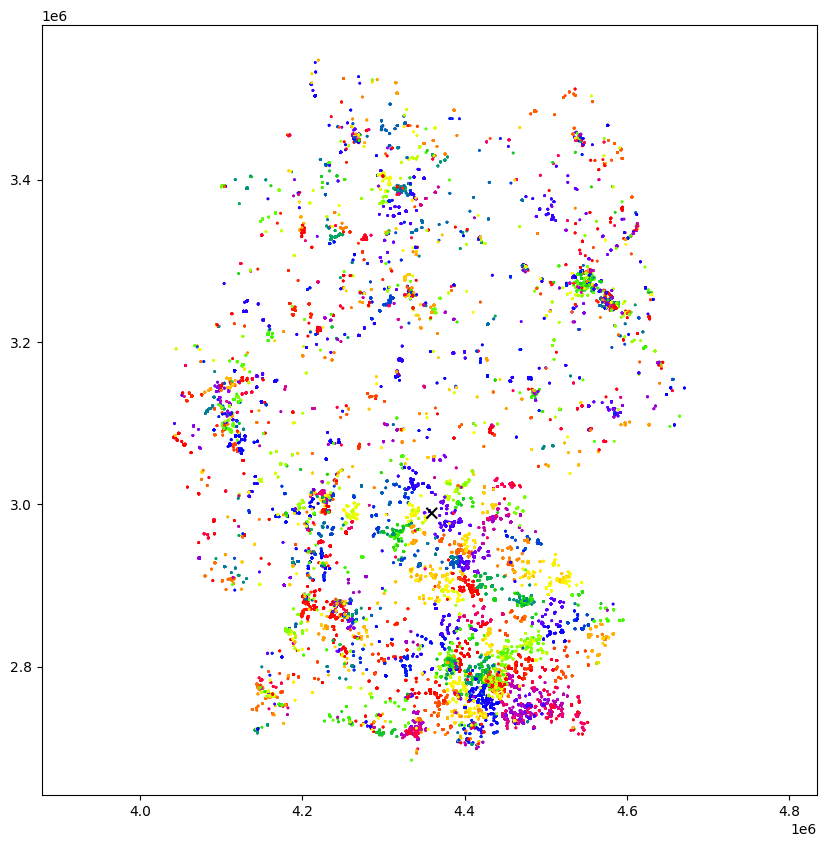

In [161]:
fig, ax = plt.subplots(figsize=(10, 10))
codes, uniques = pd.factorize(gdf.stratify_key)
counts = gdf.groupby("stratify_key")["X"].count()
single_keys = counts[counts == 1].index
mask = gdf["stratify_key"].isin(single_keys)
gdf['plot_color'] = gdf['stratify_key'].map(lambda x: 'black' if counts.get(x, default=0) == 1 else 'none')

ax.scatter(gdf.X, gdf.Y, c=codes, s=1, cmap='prism')

ax.scatter(gdf.X, gdf.Y, c=gdf.plot_color, s=mask.map({True : 60, False : 1}), 
    marker='x')

ax.set_aspect('equal', adjustable='datalim')

plt.show()

In [162]:
from sklearn.model_selection import train_test_split

# Perform split
# 'train_size' is your desired sample percentage (e.g., 0.1 for 10%)
sample_gdf, _ = train_test_split(
    gdf, 
    train_size=0.1, 
    stratify=gdf['stratify_key'],
    random_state=42
)

ValueError: The least populated classes in y have only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Classes with too few members are: ['363775_23']

In [115]:
sample_gdf

,str_id,cut,id,geometry,X,Y,label,label_agg,cell_id,stratify_key,plot_color
127744,1_22722252,1,22722252,POINT (4484568.85 2911293.128),4.484569e+06,2.911293e+06,112,11,14,14_11,none
164860,1_1064957,1,1064957,POINT (4112520.86 3147041.465),4.112521e+06,3.147041e+06,112,11,8,8_11,none
83806,0_27478800,0,27478800,POINT (4446058.239 2778849.094),4.446058e+06,2.778849e+06,112,11,18,18_11,none
60087,1_27486151,1,27486151,POINT (4482328.103 2822330.745),4.482328e+06,2.822331e+06,211,21,18,18_21,none
87817,0_27933414,0,27933414,POINT (4443445.682 2778447.208),4.443446e+06,2.778447e+06,112,11,18,18_11,none
...,...,...,...,...,...,...,...,...,...,...,...
77775,2_22902552,2,22902552,POINT (4443357.54 2778332.631),4.443358e+06,2.778333e+06,112,11,18,18_11,none
40652,2_27624923,2,27624923,POINT (4396589.787 2943583.83),4.396590e+06,2.943584e+06,112,11,14,14_11,none
169201,1_498455,1,498455,POINT (4233347.698 3007829.4),4.233348e+06,3.007829e+06,211,21,13,13_21,none
34626,0_26867738,0,26867738,POINT (4457518.754 2777165.706),4.457519e+06,2.777166e+06,112,11,18,18_11,none
